In [23]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import torch
from torch import nn
import itertools
import shutil
import os, json, cv2, random, sys
from collections import defaultdict, Counter
from PIL import Image, ImageDraw, ImageFont

In [24]:
sys.path.append('../yolov5/')

In [25]:
torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

device(type='cuda', index=0)

In [26]:
# fine_tuned = torch.load('../yolov5/projects/COCO-street-from-scratch-2/exp/weights/best.pt')['model'].float().eval()
fine_tuned = torch.load('../yolov5/projects/COCO-street-from-scratch-3/exp/weights/best.pt')['model'].float().eval()
fine_tuned = fine_tuned.autoshape()

Adding AutoShape... 


In [27]:
fine_tuned = fine_tuned.autoshape()
fine_tuned.conf = 0.4
fine_tuned.iou = 0.45
fine_tuned.multi_label = False  # NMS multiple labels per box
fine_tuned.max_det = 20

AutoShape already enabled, skipping... 


In [28]:
all_files = '../data/'

In [29]:
dataset_dict = defaultdict(list)
for root, dirs, files in os.walk(all_files):
    files = [file for file in files if file.split('.')[-1].lower() in ('jpg', 'png', 'jpeg')]
    files = [os.path.join(root, file) for file in files]
    if len(files) == 0:
        continue
    root_name = root[len(all_files):]
    dataset_dict[root_name] = files

In [30]:
dict(map(lambda k: (k[0], len(k[1])), dataset_dict.items()))

{'Другие животные': 319,
 'Пустые': 381,
 'test_images': 314,
 'Только собака/разноцветный - короткий хвост': 173,
 'Только собака/светлый - длинный хвост': 207,
 'Только собака/разноцветный - длинный хвост': 146,
 'Только собака/темный - короткий хвост': 225,
 'Только собака/светлый - короткой хвост': 256,
 'Только собака/темный - длинный хвост': 166,
 'Хозяин и собака': 520}

In [31]:
check_dogs = dataset_dict['Хозяин и собака']
check_dogs[:5]

['../data/Хозяин и собака/530.jpg',
 '../data/Хозяин и собака/2009.jpg',
 '../data/Хозяин и собака/495.jpg',
 '../data/Хозяин и собака/575.jpg',
 '../data/Хозяин и собака/2016.jpg']

In [32]:
def images_iterator(images: list):
    for im_path in images:
        nd_array = cv2.imread(im_path)
        if nd_array is not None:
            yield im_path, cv2.cvtColor(nd_array, cv2.COLOR_BGR2RGB)

In [33]:
found_results = []
for im_path, image in images_iterator(check_dogs):
    inf_res = fine_tuned(image)
    inf_res.print()
    res_df = inf_res.pandas().xyxy[0]
    res_df['im_path'] = im_path
#     res_df = res_df.query("name=='dog' or name=='person'")
#     if len(res_df.query("name=='dog'")) > 0 and len(res_df.query("name=='person'")) > 0:
#     res_df = res_df.query("name=='dog'")
    if len(res_df.query("name=='dog'")) > 0:
        found_results.append(res_df)

image 1/1: 784x1280 1 dog, 1 person
Speed: 3.0ms pre-process, 257.0ms inference, 3.2ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 1.9ms pre-process, 282.9ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 1.9ms pre-process, 231.1ms inference, 0.7ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 2.0ms pre-process, 231.4ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 1.9ms pre-process, 230.5ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 1.8ms pre-process, 250.0ms inference, 0.7ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 1.6ms pre-process, 231.6ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 1.8ms pre-process, 232.2ms inference, 0.6ms NMS per image at shape (

image 1/1: 784x1280 1 dog, 1 person
Speed: 2.1ms pre-process, 241.6ms inference, 0.7ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 2.2ms pre-process, 228.8ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 2 persons
Speed: 2.2ms pre-process, 242.1ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 5 persons
Speed: 1.9ms pre-process, 228.7ms inference, 0.7ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 2 dogs, 1 person
Speed: 1.9ms pre-process, 228.2ms inference, 0.7ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 1.8ms pre-process, 227.7ms inference, 0.8ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 2 persons
Speed: 1.8ms pre-process, 228.1ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 1144x1920 1 dog, 2 persons
Speed: 2.0ms pre-process, 204.9ms inference, 0.6ms NMS per image at s

image 1/1: 784x1280 1 dog, 1 person
Speed: 2.4ms pre-process, 270.6ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 3 persons
Speed: 2.1ms pre-process, 257.2ms inference, 0.7ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 2.0ms pre-process, 226.9ms inference, 0.7ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 3 persons
Speed: 1.8ms pre-process, 230.9ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 1.8ms pre-process, 225.7ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 2 persons
Speed: 1.9ms pre-process, 249.2ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 2 persons
Speed: 1.7ms pre-process, 228.0ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 2.0ms pre-process, 262.6ms inference, 0.7ms NMS per image at shape (1, 

Speed: 4.3ms pre-process, 248.3ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 1.9ms pre-process, 231.4ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 1.8ms pre-process, 230.7ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 1.9ms pre-process, 304.9ms inference, 0.7ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 1.9ms pre-process, 245.9ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 2 persons
Speed: 1.8ms pre-process, 232.6ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 2.1ms pre-process, 252.5ms inference, 0.7ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 1.8ms pre-process, 230.0ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280

image 1/1: 784x1280 2 dogs, 4 persons
Speed: 2.0ms pre-process, 233.2ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 1.8ms pre-process, 255.4ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 2.1ms pre-process, 228.6ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 2 dogs, 1 person
Speed: 1.8ms pre-process, 228.9ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 2 dogs, 5 persons
Speed: 1.9ms pre-process, 284.9ms inference, 0.7ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 2.0ms pre-process, 250.4ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 (no detections)
Speed: 1.9ms pre-process, 242.5ms inference, 0.3ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 (no detections)
Speed: 1.9ms pre-process, 245.0ms inference, 0.3ms NMS per image at sh

image 1/1: 784x1280 1 dog, 3 persons
Speed: 2.5ms pre-process, 275.7ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 1.9ms pre-process, 227.3ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 2.1ms pre-process, 233.0ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
Corrupt JPEG data: premature end of data segment
image 1/1: 784x1280 1 dog, 1 person
Speed: 2.1ms pre-process, 344.9ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 2.2ms pre-process, 285.0ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 2 persons
Speed: 1.8ms pre-process, 225.3ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 2 dogs, 2 persons
Speed: 1.8ms pre-process, 283.7ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 (no detections)
Speed: 1.9ms pre-proce

Speed: 5.6ms pre-process, 282.8ms inference, 0.8ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 2 persons
Speed: 2.2ms pre-process, 361.4ms inference, 0.7ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 6 persons
Speed: 20.7ms pre-process, 357.5ms inference, 0.7ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 1144x1920 1 dog, 3 persons
Speed: 1.8ms pre-process, 212.1ms inference, 0.6ms NMS per image at shape (1, 3, 384, 640)
image 1/1: 784x1280 1 dog, 2 persons
Speed: 2.1ms pre-process, 255.1ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 1.9ms pre-process, 323.4ms inference, 0.7ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 2.1ms pre-process, 248.6ms inference, 1.0ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 2.1ms pre-process, 345.0ms inference, 0.7ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784

Speed: 2.4ms pre-process, 361.8ms inference, 0.7ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 2.1ms pre-process, 247.3ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 2 persons
Speed: 2.0ms pre-process, 229.8ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 2.1ms pre-process, 240.6ms inference, 0.8ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 1.8ms pre-process, 230.1ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 3 persons
Speed: 1.8ms pre-process, 226.5ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 784x1280 1 dog, 1 person
Speed: 2.1ms pre-process, 309.4ms inference, 0.6ms NMS per image at shape (1, 3, 416, 640)
image 1/1: 1144x1920 2 dogs, 5 persons
Speed: 1.8ms pre-process, 253.8ms inference, 0.6ms NMS per image at shape (1, 3, 384, 640)
image 1/1: 784x

In [34]:
def show_image_with_regions(df, color=(128, 128, 128), txt_color=(255, 255, 255)):
    im_path = str(df['im_path'].values[0])
    nd_array = cv2.imread(im_path)
    nd_array = cv2.cvtColor(nd_array, cv2.COLOR_BGR2RGB)
    
    lw = max(round(sum(nd_array.shape) / 2 * 0.003), 2)
    tf = max(lw - 1, 1)  # font thickness
    
    for i, row in df.iterrows():
        label = row['name'] + ' ' + str(round(row['confidence'], 3))
        
        sp = (int(row['xmin']), int(row['ymin']))
        ep = (int(row['xmax']), int(row['ymax']))
        print(sp, ep)
        
        cv2.rectangle(nd_array, sp, ep, color, thickness=lw, lineType=cv2.LINE_AA)
        
        w, h = cv2.getTextSize(label, 0, fontScale=lw / 3, thickness=tf)[0]  # text width, height
        outside = sp[1] - h - 3 >= 0  # label fits outside box
        
        ep = sp[0] + w, sp[1] - h - 3 if outside else sp[1] + h + 3
        cv2.rectangle(nd_array, sp, ep, color, -1, cv2.LINE_AA)
        cv2.putText(nd_array, label, (sp[0], sp[1] - 2 if outside else sp[1] + h + 2), 0, lw / 3, txt_color,
                        thickness=tf, lineType=cv2.LINE_AA)
        
    
    plt.figure(figsize = (20,20))
    plt.imshow(np.squeeze(nd_array))
    plt.show()

In [35]:
len(found_results)

472

(454, 520) (506, 712)
(659, 665) (727, 724)
(0, 590) (44, 751)
(658, 664) (728, 724)


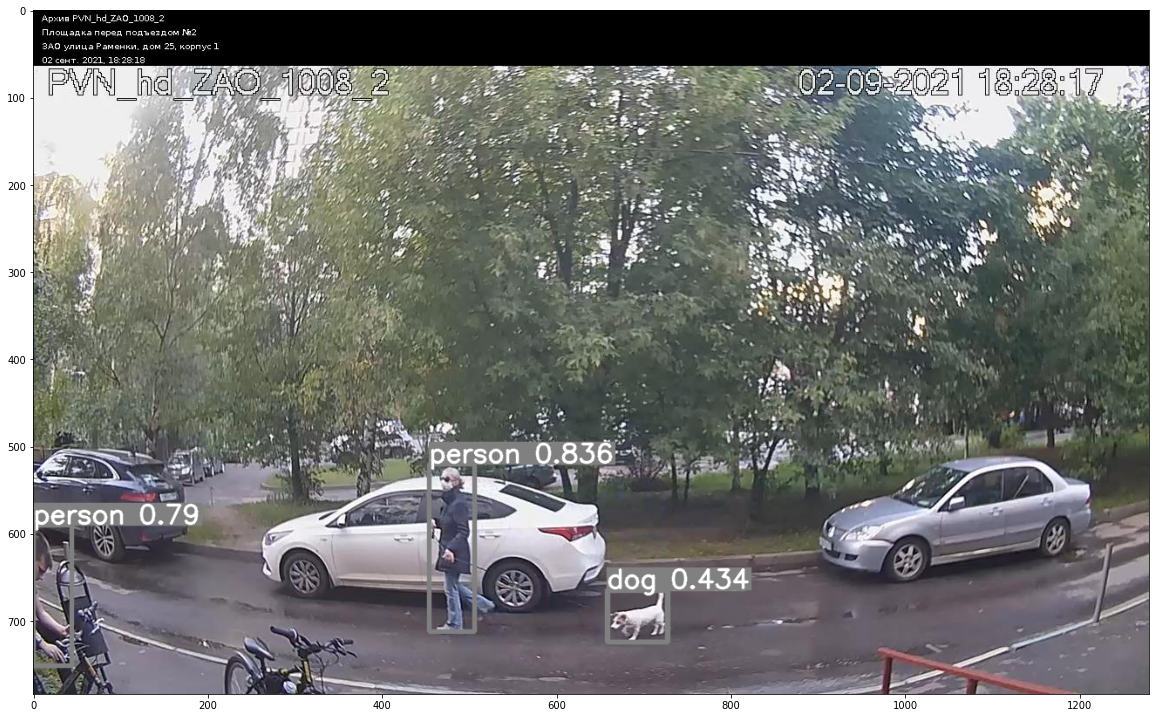

In [45]:
%matplotlib inline 
show_image_with_regions(found_results[228])

In [1]:
!cd ../yolov5

In [58]:
!python ../yolov5/detect.py --weights "../yolov5/projects/COCO-street-from-scratch-3/exp/weights/best.pt" --source "../datasets/hack_scratch/valid/images/" --save-txt --conf-thres 0.35 --save-crop --hide-labels --hide-conf

detect: weights=['../yolov5/projects/COCO-street-from-scratch-3/exp/weights/best.pt'], source=../datasets/hack_scratch/valid/images/, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False
YOLOv5 🚀 v6.0-62-g5f603a9 torch 1.9.1+cu102 CUDA:0 (GeForce RTX 2060, 5935MiB)

Fusing layers... 
Model Summary: 367 layers, 46124433 parameters, 0 gradients, 107.8 GFLOPs
image 1/164 /home/hivaze/CODE-W/PyCharm/dogfound/neural_network/datasets/hack_scratch/valid/images/6255_734_jpg.rf.1253ef88fb7007039bfc68bc41126ed7.jpg: 416x640 1 dog, Done. (0.043s)
image 2/164 /home/hivaze/CODE-W/PyCharm/dogfound/neural_network/datasets/hack_scratch/valid/images/6259_6826_jpg.rf.e851d3ca02d082aa9a8f32a63c7b9c18

image 42/164 /home/hivaze/CODE-W/PyCharm/dogfound/neural_network/datasets/hack_scratch/valid/images/6753_2266_jpg.rf.fc6ef5ed6ae3b1fe4f9ef78d10836b03.jpg: 384x640 1 dog, 2 persons, Done. (0.019s)
image 43/164 /home/hivaze/CODE-W/PyCharm/dogfound/neural_network/datasets/hack_scratch/valid/images/6760_2097_jpg.rf.79222127b00060506cb634d26b689268.jpg: 416x640 1 dog, 2 persons, Done. (0.024s)
image 44/164 /home/hivaze/CODE-W/PyCharm/dogfound/neural_network/datasets/hack_scratch/valid/images/6763_2578_jpg.rf.bd3a34b85491eddc2d1dbcef87022bc4.jpg: 640x320 1 dog, 2 persons, Done. (0.019s)
image 45/164 /home/hivaze/CODE-W/PyCharm/dogfound/neural_network/datasets/hack_scratch/valid/images/6800_834_jpg.rf.79819a8273b608f2b355a8e0080433df.jpg: 640x480 1 dog, Done. (0.026s)
image 46/164 /home/hivaze/CODE-W/PyCharm/dogfound/neural_network/datasets/hack_scratch/valid/images/6816_6156_jpg.rf.a5ce0f7685397df200facfed968d15e3.jpg: 416x640 3 dogs, 1 person, Done. (0.025s)
image 47/164 /home/hivaze/CODE-W

image 86/164 /home/hivaze/CODE-W/PyCharm/dogfound/neural_network/datasets/hack_scratch/valid/images/7483_170_png.rf.7d74371a752174e70db68b5d43f35cec.jpg: 640x640 1 dog, Done. (0.034s)
image 87/164 /home/hivaze/CODE-W/PyCharm/dogfound/neural_network/datasets/hack_scratch/valid/images/7503_2025_jpg.rf.fd341f9c935754b13a05d5aed84d1fe1.jpg: 416x640 1 dog, 1 person, Done. (0.025s)
image 88/164 /home/hivaze/CODE-W/PyCharm/dogfound/neural_network/datasets/hack_scratch/valid/images/7513_6557_jpg.rf.bcc51e019358ec3025844d220fc0c453.jpg: 640x288 1 dog, Done. (0.019s)
image 89/164 /home/hivaze/CODE-W/PyCharm/dogfound/neural_network/datasets/hack_scratch/valid/images/7553_2139_jpg.rf.04845561e5670ee45d020a99b6ed2690.jpg: 416x640 1 dog, 4 persons, Done. (0.027s)
image 90/164 /home/hivaze/CODE-W/PyCharm/dogfound/neural_network/datasets/hack_scratch/valid/images/7577_6283_jpg.rf.c4b27cd1947b74c5cff007dd374dd9e2.jpg: 416x640 1 dog, 2 persons, Done. (0.024s)
image 91/164 /home/hivaze/CODE-W/PyCharm/dog

image 130/164 /home/hivaze/CODE-W/PyCharm/dogfound/neural_network/datasets/hack_scratch/valid/images/8137_6650_jpg.rf.ca15203eb8b7b6b3b4d070d11e13477b.jpg: 640x480 2 dogs, Done. (0.028s)
image 131/164 /home/hivaze/CODE-W/PyCharm/dogfound/neural_network/datasets/hack_scratch/valid/images/8148_2541_jpg.rf.37817b296a1c0005083dd4c53672d374.jpg: 640x640 1 dog, 1 person, Done. (0.034s)
image 132/164 /home/hivaze/CODE-W/PyCharm/dogfound/neural_network/datasets/hack_scratch/valid/images/8155_2438_jpg.rf.1d2757780eeaf98e95ffba1912547ecd.jpg: 640x480 1 dog, Done. (0.026s)
image 133/164 /home/hivaze/CODE-W/PyCharm/dogfound/neural_network/datasets/hack_scratch/valid/images/8163_2513_jpg.rf.8eaa7c8ec7e0d6589dec9bfbb8e10e6b.jpg: 416x640 Done. (0.025s)
image 134/164 /home/hivaze/CODE-W/PyCharm/dogfound/neural_network/datasets/hack_scratch/valid/images/8219_6178_jpg.rf.1014f0c54eb778ccfd3a62ebf3941686.jpg: 416x640 1 dog, 2 persons, Done. (0.023s)
image 135/164 /home/hivaze/CODE-W/PyCharm/dogfound/neur

In [14]:
# dataset_fixes_addition = list(set([res['im_path'][0] for res in found_results]))
# dataset_fixes_addition[:7]

['../data/Другие животные/2321.jpg',
 '../data/Другие животные/2337.jpg',
 '../data/Другие животные/6147.jpg',
 '../data/Другие животные/725.jpg',
 '../data/Другие животные/727.jpg',
 '../data/Другие животные/6493.jpg',
 '../data/Другие животные/726.jpg']

In [16]:
# to_fix_dir = '../data/must_not_be_dogs_2/'
# for file in dataset_fixes_addition:
#     fpath = os.path.join(to_fix_dir, str(random.randint(1001, 10000)) + '_' + os.path.relpath(file, '../data').split('/')[-1])
#     print(f'Copy {file} to {fpath}...')
#     shutil.copyfile(file, fpath)